# Classification using word embeddings 
In this case I will use the same dataset of Mental Heaklth and find out how word embeddings can help in classification tasks  for text data.|

In [1]:
import pandas as pd 
import numpy as np 
import spacy 

In [2]:
df_mh = pd.read_csv("../data/mental_health/Combined Data.csv")
df_mh.drop(columns=['Unnamed: 0'], inplace=True)
df_mh.dropna(inplace=True)
df_mh

,statement,status
0,oh my gosh,Anxiety
1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,I've shifted my focus to something else but I'...,Anxiety
4,"I'm restless and restless, it's been a month n...",Anxiety
...,...,...
53038,Nobody takes me seriously I’ve (24M) dealt wit...,Anxiety
53039,"selfishness ""I don't feel very good, it's lik...",Anxiety
53040,Is there any way to sleep better? I can't slee...,Anxiety
53041,"Public speaking tips? Hi, all. I have to give ...",Anxiety


In [3]:
# # This is to install the large english model to make the word embeddings with sapacy
# !python -m spacy download en_core_web_lg
nlp =  spacy.load("en_core_web_lg")
def preprocess(text):
    clean_txt =[]
    text = text.lower()
    doc = nlp(text)
    for token in doc:
        if token.is_punct == False:
            clean_txt.append(token.lemma_)
    return " ".join(clean_txt)

In [4]:
preprocess(df_mh['statement'][53038])

'nobody take I seriously I ’ve 24 m deal with depression anxiety for year now I use to be great with people make good money have the nice car great girlfriend supportive parent friend that I could say look up to I etc and then I be diagnose with depression within about a year I quit my job lose my girlfriend even though she be great to I and have yet to keep a stable job for more than a month at a time \n\n my depression eventually be rule to be treatment resistant after be on a number of med and try many other thing some would work for a couple month and then I ’d fall even far back from where I be \n\n but now after not having work since early july of 2022 I be deal with extensive and scary brain fog I ’ve incorporate work out eat healthy take supplement and just try to live a healthy lifestyle as I figure this be come from a bad diet my whole life I also get all blood work do include thyroid basic vitamin level testosterone etc and everything come back normal other than pretty high 

In [5]:

df_mh['proc_statement'] = df_mh.statement.apply(preprocess)

In [6]:
df_mh.drop(columns=['statement'], inplace=True)
df_mh

,status,proc_statement
0,Anxiety,oh my gosh
1,Anxiety,trouble sleep confused mind restless heart all...
2,Anxiety,all wrong back off dear forward doubt stay in ...
3,Anxiety,I have shift my focus to something else but I ...
4,Anxiety,I be restless and restless it be be a month no...
...,...,...
53038,Anxiety,nobody take I seriously I ’ve 24 m deal with d...
53039,Anxiety,selfishness I do not feel very good it be li...
53040,Anxiety,be there any way to sleep well I can not sleep...
53041,Anxiety,public speaking tip hi all I have to give a pr...


In [7]:
df_mh.to_csv("../data/mental_health/embeddings_mental_health_data.csv")

In [8]:
df_mh['vector']= df_mh.proc_statement.apply(lambda x: nlp(x).vector)
df_mh

,status,proc_statement,vector
0,Anxiety,oh my gosh,"[-0.25945, 0.13983373, -0.49716333, -0.0200033..."
1,Anxiety,trouble sleep confused mind restless heart all...,"[0.11404935, 0.25631872, -0.2004133, -0.121831..."
2,Anxiety,all wrong back off dear forward doubt stay in ...,"[0.118164115, 0.03462843, -0.2569069, -0.01292..."
3,Anxiety,I have shift my focus to something else but I ...,"[0.051424768, 0.2033825, -0.26660407, -0.07939..."
4,Anxiety,I be restless and restless it be be a month no...,"[-0.023294311, 0.14586812, -0.2576566, -0.1249..."
...,...,...,...
53038,Anxiety,nobody take I seriously I ’ve 24 m deal with d...,"[-0.033036847, 0.19639173, -0.23344404, -0.031..."
53039,Anxiety,selfishness I do not feel very good it be li...,"[-0.04998131, 0.1965993, -0.29295045, -0.11427..."
53040,Anxiety,be there any way to sleep well I can not sleep...,"[0.039899223, 0.14295164, -0.29748437, -0.0725..."
53041,Anxiety,public speaking tip hi all I have to give a pr...,"[-0.02157549, 0.22035778, -0.20442963, -0.0128..."


In [9]:
df_mh.to_csv("../data/mental_health/embeddings_mental_health_data.csv")
df_mh_emb = df_mh.copy()

In [10]:
emotions = list(df_mh_emb.status.unique())
target =  {k:t for t,k in enumerate(emotions)}
target

{'Anxiety': 0,
 'Normal': 1,
 'Depression': 2,
 'Suicidal': 3,
 'Stress': 4,
 'Bipolar': 5,
 'Personality disorder': 6}

In [11]:
df_mh_emb.status.value_counts()

status
Normal                  16343
Depression              15404
Suicidal                10652
Anxiety                  3841
Bipolar                  2777
Stress                   2587
Personality disorder     1077
Name: count, dtype: int64

In [12]:
df_mh_emb['cat_num'] =  df_mh_emb['status'].map(target)
df_mh_emb

,status,proc_statement,vector,cat_num
0,Anxiety,oh my gosh,"[-0.25945, 0.13983373, -0.49716333, -0.0200033...",0
1,Anxiety,trouble sleep confused mind restless heart all...,"[0.11404935, 0.25631872, -0.2004133, -0.121831...",0
2,Anxiety,all wrong back off dear forward doubt stay in ...,"[0.118164115, 0.03462843, -0.2569069, -0.01292...",0
3,Anxiety,I have shift my focus to something else but I ...,"[0.051424768, 0.2033825, -0.26660407, -0.07939...",0
4,Anxiety,I be restless and restless it be be a month no...,"[-0.023294311, 0.14586812, -0.2576566, -0.1249...",0
...,...,...,...,...
53038,Anxiety,nobody take I seriously I ’ve 24 m deal with d...,"[-0.033036847, 0.19639173, -0.23344404, -0.031...",0
53039,Anxiety,selfishness I do not feel very good it be li...,"[-0.04998131, 0.1965993, -0.29295045, -0.11427...",0
53040,Anxiety,be there any way to sleep well I can not sleep...,"[0.039899223, 0.14295164, -0.29748437, -0.0725...",0
53041,Anxiety,public speaking tip hi all I have to give a pr...,"[-0.02157549, 0.22035778, -0.20442963, -0.0128...",0


In [13]:
undersamp = []

for cat in emotions:
    undersamp.append(df_mh_emb[df_mh_emb.status == cat].sample(1077,random_state=101))

balnced_df = pd.concat(undersamp, axis=0)
print(balnced_df.status.value_counts())
print(balnced_df)

status
Anxiety                 1077
Normal                  1077
Depression              1077
Suicidal                1077
Stress                  1077
Bipolar                 1077
Personality disorder    1077
Name: count, dtype: int64
                     status  \
35643               Anxiety   
52942               Anxiety   
52241               Anxiety   
52384               Anxiety   
35005               Anxiety   
...                     ...   
51288  Personality disorder   
51739  Personality disorder   
50737  Personality disorder   
51320  Personality disorder   
51615  Personality disorder   

                                          proc_statement  \
35643  seek post cancer anxiety advice I have cancer ...   
52942  be it normal for an ssri to make you feel like...   
52241  today I be calm and collect hi fella so I be u...   
52384  what actually help your sudden panic attack ph...   
35005  use tap water to rinse sinus extremely anxious...   
...                            

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test  = train_test_split(balnced_df.vector,balnced_df.cat_num, test_size=0.2,
                                                     random_state=101, stratify= balnced_df.cat_num)

In [15]:
X_train = np.stack(X_train)
X_test = np.stack(X_test)

In [16]:
print(X_train.shape, X_test.shape)

(6031, 300) (1508, 300)


In [17]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

clf_nb = MultinomialNB()
clf_nb.fit(X_train,y_train)

MultinomialNB()

                      precision    recall  f1-score   support

             Anxiety       0.61      0.51      0.55       215
              Normal       0.76      0.53      0.62       216
          Depression       0.23      0.17      0.20       215
            Suicidal       0.35      0.61      0.44       216
              Stress       0.31      0.36      0.33       215
             Bipolar       0.59      0.42      0.49       215
Personality disorder       0.43      0.45      0.44       216

            accuracy                           0.44      1508
           macro avg       0.47      0.44      0.44      1508
        weighted avg       0.47      0.44      0.44      1508



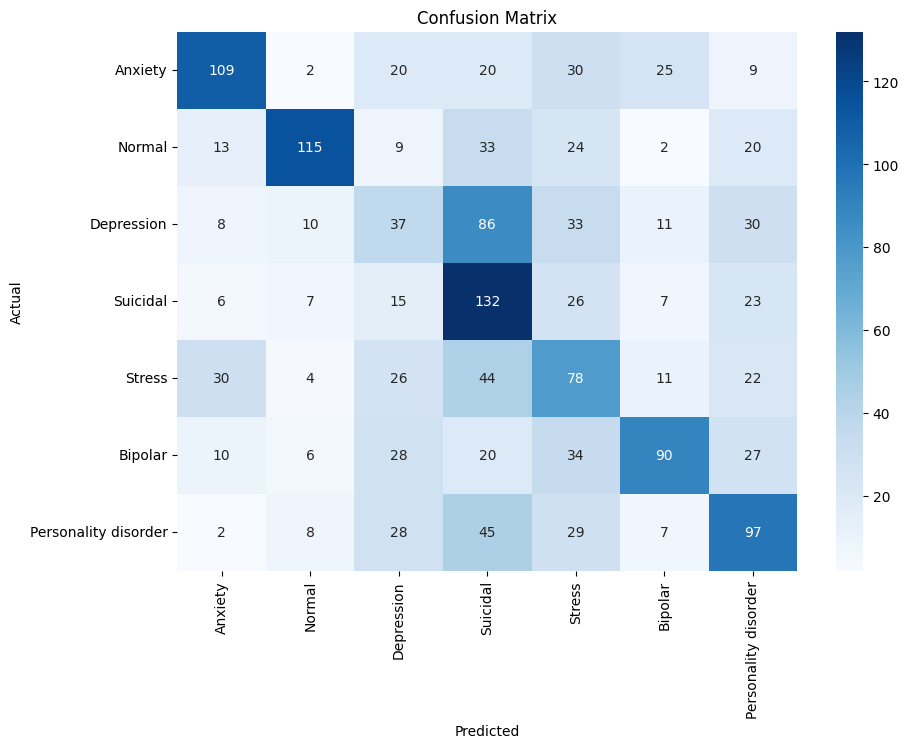

In [21]:
from sklearn.metrics._classification import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns 

import matplotlib.pyplot as plt

y_pred = clf_nb.predict(X_test)

print(classification_report(y_test,y_pred,target_names=target))


cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=target.keys(), yticklabels=target.keys(), cmap='Blues')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

                      precision    recall  f1-score   support

             Anxiety       0.76      0.25      0.38       215
              Normal       0.89      0.44      0.59       216
          Depression       0.18      0.10      0.13       215
            Suicidal       0.32      0.76      0.45       216
              Stress       0.29      0.40      0.33       215
             Bipolar       0.52      0.25      0.34       215
Personality disorder       0.36      0.47      0.41       216

            accuracy                           0.38      1508
           macro avg       0.47      0.38      0.38      1508
        weighted avg       0.47      0.38      0.38      1508



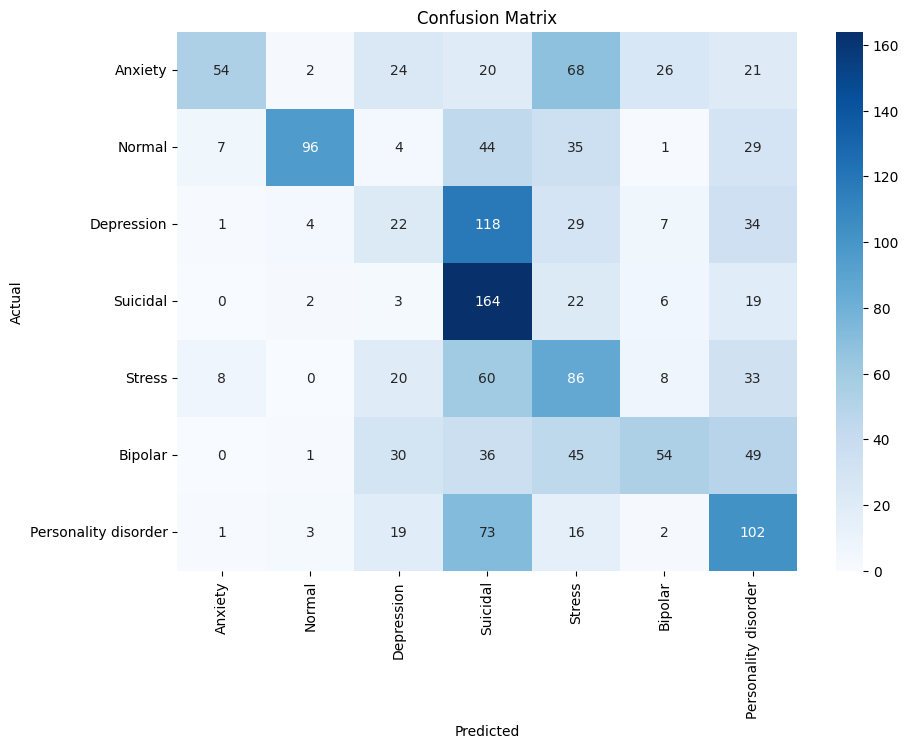

In [23]:
from sklearn.svm import SVC
clf_svc = SVC(C=2,gamma='auto', kernel='rbf')

clf_svc.fit(X_train,y_train)

y_pred = clf_svc.predict(X_test)


print(classification_report(y_test,y_pred,target_names=target))


cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=target.keys(), yticklabels=target.keys(), cmap='Blues')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()